# 과제 : K-means와 DBSCAN 비교


아래 데이터셋을 활용하여 클러스터링을 하려고 합니다.
코드의 빈칸을 채우시고, 주관식 문제에 답해주세요.

## 데이터셋 불러오기 및 시각화

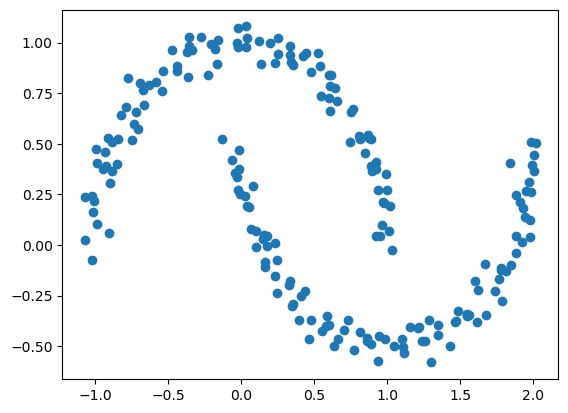

C:\Users\USER\Anaconda_\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Anaconda_\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

x, y = make_moons(n_samples = 200, shuffle = True, noise = 0.05, random_state = 0)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

km = KMeans(n_clusters = 2, random_state = 0)
pred1 = km.fit_predict(x)

## K-means 클러스터링

### Elbow method

C:\Users\USER\Anaconda_\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Anaconda_\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\Anaconda_\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Anaconda_\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

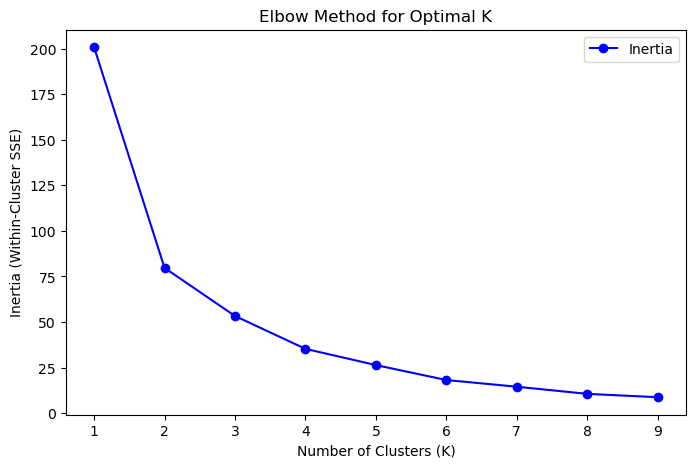

In [3]:
# 엘보우 메소드 시각화
inertia_values = []
silhouette_values = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(x)
    inertia_values.append(km.inertia_)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(K_range, inertia_values, marker='o', linestyle='-', color='blue', label="Inertia")
ax1.set_xlabel("Number of Clusters (K)")
ax1.set_ylabel("Inertia (Within-Cluster SSE)")
ax1.set_title("Elbow Method for Optimal K")
ax1.legend()
plt.show()

### 문제 1
**엘보우 메소드를 바탕으로, 최적의 K값을 설정하여 코드의 빈칸을 채운 후, 판단 근거를 서술하세요.**

In [5]:
# 3️⃣ 최적의 K값 선택 (엘보우 지점)
optimal_k = 2  # 엘보우 메소드에서 꺾이는 지점을 선택

### 결과

C:\Users\USER\Anaconda_\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\Anaconda_\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


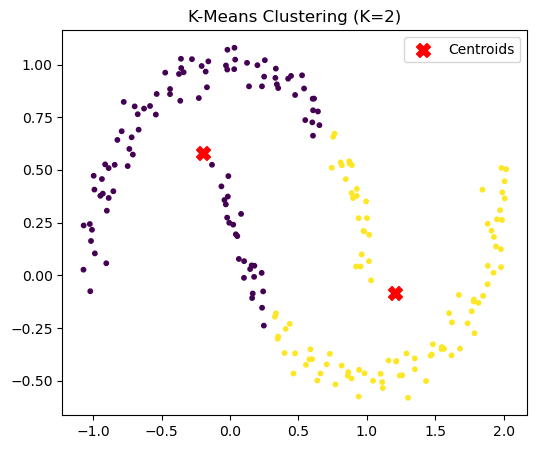

In [8]:
# K-Means 클러스터링 실행
km = KMeans(n_clusters=optimal_k, random_state=0)
pred_kmeans = km.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_kmeans, cmap='viridis', s=10)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.legend()
plt.show()


## DBSACN

### 문제 2
**eps와 min_samlpes의 개념을 이해한 후, 이 둘을 조절하여 실행해보며 아래 사진과 같은 군집을 형성하세요.**

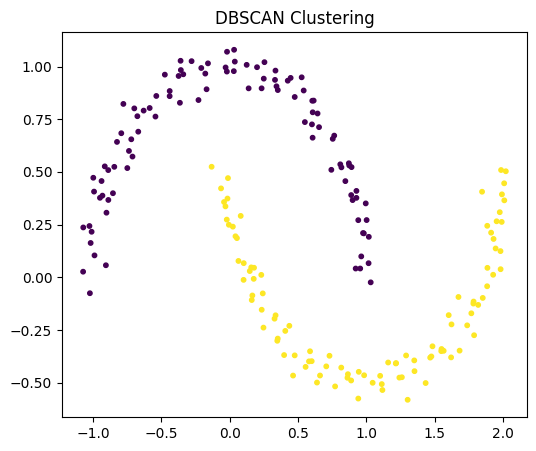

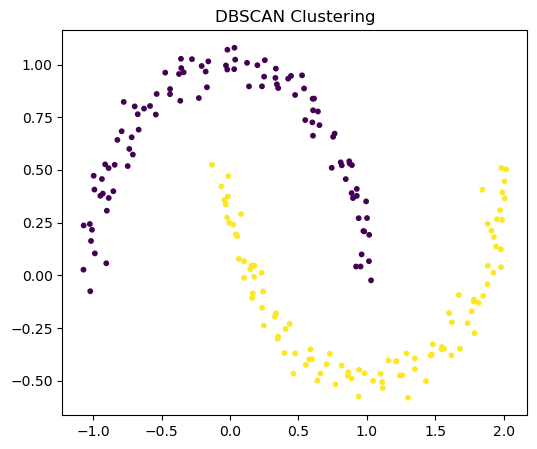

In [10]:
# DBSCAN 클러스터링 실행
dbscan = DBSCAN(eps= 0.2 , min_samples= 3 )
pred_dbscan = dbscan.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_dbscan, cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.show()


### 문제 3
**eps와 min_samples가 너무 크거나 작을 때, 왜 상식적인 군집화가 이루어지지 않았을까요?**

eps가 너무 큰 경우 하나의 점을 기준으로 주변 반경이 너무 커 min_samples를 크게 하더라도 해당 점과 상관없는 점들까지 하나의 cluster로 간주될 수 있다.반대로 eps가 너무 작은 경우 주변 반경이 너무 작아 밀도가 충분히 높은데도 불구하고 해당 점이 core point로 선정되지 않을 수 있다.

min_samples가 너무 큰 경우 밀도가 충분히 높은데도 불구하고 core point로 선정되지 않을 수 있고 너무 작은 경우 해당 점과 관련 없는 점들이 하나의 군집으로 형성될 수 있고 해당 점이 이상치인데도 불구하고 하나의 집단으로 묶일 수 있다.

### 문제 4
**K-means의 결과와, DBSCAN의 결과가 다른 이유를 특징을 포함하여 서술하세요.**


K-means의 경우 특정 집단의 centroid까지의 거리를 기반으로 판단하기 때문에 특정 집단의 중심으로부터 멀리 떨어진 점들의 경우 다른 집단으로 분류될 가능성이 높다. 하지만 DBSCAN의 경우 주변 점들과의 밀집도를 기반으로 판단하기 때문에 집단의 중심으로부터 멀리 떨어져 있더라도 주변에 같은 집단의 점들이 존재한다면 같은 집단으로 분류될 가능성이 높다.